In [93]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math

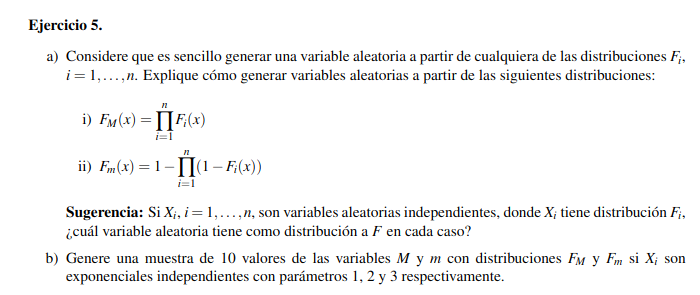

$$
\text{Desarrollamos el producto de } F_M \\
F_M = \prod_{i=1}^{n} F_i(x) = F_1(x).F_2(x)... F_n(x) \\
= P(X_1 \leq x).P(X_2 \leq x)...P(X_n \leq x) \\
= P(X_1 \leq x, X_2 \leq x, ..., X_n \leq x) \\
= P(\max(X_1, X_2, ..., X_n) \leq x) \\
$$

In [94]:
def gen_exponencial (lamda):
    u = 1-rd.random()
    return -np.log(1-u)/lamda

In [95]:
def generar_M(fi):
    """ 
    Para generar M, debo generar un valor por cada variable dentro de fi
    y tomar el maximo de todos esos valores.
    """
    u = rd.random()
    values = []
    for i in range(len(fi)):
        values.append(fi[i]['gen'](*fi[i]['params']))

    return max(values)

In [96]:
# defino el fi para este caso
# son 3 variables exponenciales con parametros 1 ,2 y 3.
fi ={
    0: {
        'gen': gen_exponencial, 
        'params': [1]
    },
    1: {
        'gen': gen_exponencial, 
        'params': [2]
    },
    2: {
        'gen': gen_exponencial, 
        'params': [3]
    }
}

In [97]:
# genero 10 valores de M
for _ in range(10):
    x = generar_M(fi)
    print(x) 

0.6497345272597843
0.976680024594241
2.0916703673301775
0.30191737807058794
0.5408633672800763
0.9491569785177733
0.5440384509486358
1.0390712213350646
0.6114798059226645
2.9454982302699615


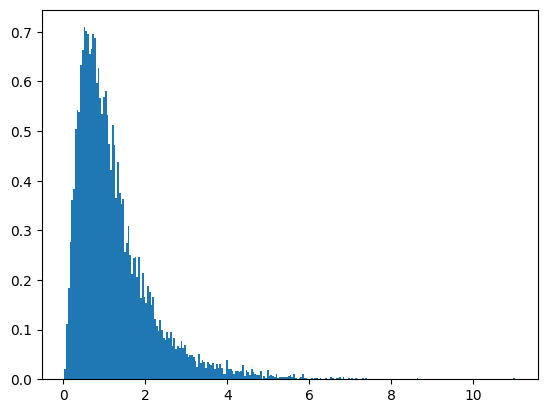

In [98]:
# histograma
sim_M = [generar_M(fi) for _ in range(10000)]

plt.hist(sim_M, bins=256, density=True)
plt.show()

In [99]:
# estimo la esperanza con el metodo para generar M
nsims = 10000
M = [generar_M(fi) for i in range(nsims)]
esperanza_estimada = sum(M)/nsims
print("Esperanza estimada del caso i): ", esperanza_estimada)

Esperanza estimada del caso i):  1.2099841072124629


#### ii 
$$
F_m(x)= 1- \prod_{i=1}^{n} (1-F_i(x)) \\
= 1- \prod_{i=1}^{n} P(X_i > x) \\
= 1- P(X_1 > x, X_2 > x, ..., X_n > x) \\
= 1- P(\min(X_1, X_2, ..., X_n) > x) \\
= P(\min(X_1, X_2, ..., X_n) \leq x) \\
$$

In [100]:
def generar_m(fi):
    values = []
    for i in range(len(fi)):
        values.append(fi[i]['gen'](*fi[i]['params']))
    return min(values)


In [101]:
# genero 10 valores de m
for _ in range(10):
    print(generar_m(fi))

0.2352182077519045
0.049269311334398484
0.24365510483766317
0.08589597435719652
0.21941433470126281
0.25197281582453807
0.07763442507284556
0.21602657369487124
0.020898834173666777
0.07521601057568199


In [102]:
# estimo esperanza usando el generador de m
nsims = 1000
M = [generar_m(fi) for i in range(nsims)]
esperanza_estimada = sum(M)/nsims
print("Esperanza estimada del caso ii): ", esperanza_estimada)

Esperanza estimada del caso ii):  0.1668170048967368


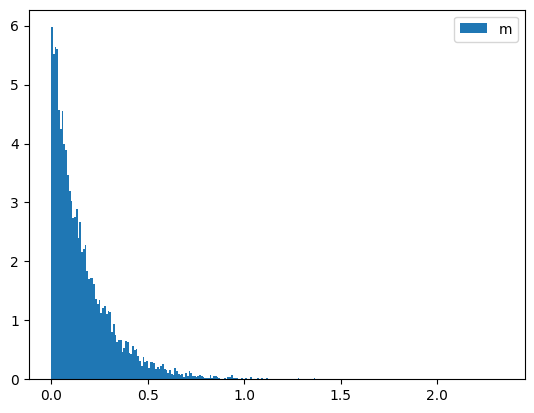

In [103]:
# generar histograma 
sim_m = [generar_m(fi) for _ in range(10000)]

plt.hist(sim_m, bins=256, density=True, label='m')
plt.legend()
plt.show()